In [1]:
# J'effectue les différents imports.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

In [2]:
# Je mets le CSV dans un dataframe
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#J'affiche les infos par colonne.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# Je regarde les dimensions de mon dataframe.
df.shape

(1460, 81)

In [5]:
# J'affiche les moyennes, quartiles, valeur min, valeur max
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# Les valeurs de chaque ligne / row.
df.values

array([[1, 60, 'RL', ..., 'WD', 'Normal', 208500],
       [2, 20, 'RL', ..., 'WD', 'Normal', 181500],
       [3, 60, 'RL', ..., 'WD', 'Normal', 223500],
       ...,
       [1458, 70, 'RL', ..., 'WD', 'Normal', 266500],
       [1459, 20, 'RL', ..., 'WD', 'Normal', 142125],
       [1460, 20, 'RL', ..., 'WD', 'Normal', 147500]], dtype=object)

Signification des colonnes:

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

In [7]:
# J'effectue un premier nettoyage du Dataframe avec les données qui me semblent pertinentes.
df_clean = df[["YrSold", "BedroomAbvGr", "CentralAir", "Heating", "HeatingQC", "OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd", "BldgType", "Condition1", "Condition2", "LotArea", "MSZoning", "SalePrice"]]

In [8]:
# J'affiche le dataframe avec les données néttoyées.
df_clean

,YrSold,BedroomAbvGr,CentralAir,Heating,HeatingQC,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BldgType,Condition1,Condition2,LotArea,MSZoning,SalePrice
0,2008,3,Y,GasA,Ex,7,5,2003,2003,1Fam,Norm,Norm,8450,RL,208500
1,2007,3,Y,GasA,Ex,6,8,1976,1976,1Fam,Feedr,Norm,9600,RL,181500
2,2008,3,Y,GasA,Ex,7,5,2001,2002,1Fam,Norm,Norm,11250,RL,223500
3,2006,3,Y,GasA,Gd,7,5,1915,1970,1Fam,Norm,Norm,9550,RL,140000
4,2008,4,Y,GasA,Ex,8,5,2000,2000,1Fam,Norm,Norm,14260,RL,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2007,3,Y,GasA,Ex,6,5,1999,2000,1Fam,Norm,Norm,7917,RL,175000
1456,2010,3,Y,GasA,TA,6,6,1978,1988,1Fam,Norm,Norm,13175,RL,210000
1457,2010,4,Y,GasA,Ex,7,9,1941,2006,1Fam,Norm,Norm,9042,RL,266500
1458,2010,2,Y,GasA,Gd,5,6,1950,1996,1Fam,Norm,Norm,9717,RL,142125


In [9]:
# Un recap des données au sein des colonnes.
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   YrSold        1460 non-null   int64 
 1   BedroomAbvGr  1460 non-null   int64 
 2   CentralAir    1460 non-null   object
 3   Heating       1460 non-null   object
 4   HeatingQC     1460 non-null   object
 5   OverallQual   1460 non-null   int64 
 6   OverallCond   1460 non-null   int64 
 7   YearBuilt     1460 non-null   int64 
 8   YearRemodAdd  1460 non-null   int64 
 9   BldgType      1460 non-null   object
 10  Condition1    1460 non-null   object
 11  Condition2    1460 non-null   object
 12  LotArea       1460 non-null   int64 
 13  MSZoning      1460 non-null   object
 14  SalePrice     1460 non-null   int64 
dtypes: int64(8), object(7)
memory usage: 171.2+ KB


In [10]:
#J'affiche les données par "SalePrice" dans un odre decroissant.
df_clean.sort_values("SalePrice", ascending=False)

,YrSold,BedroomAbvGr,CentralAir,Heating,HeatingQC,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BldgType,Condition1,Condition2,LotArea,MSZoning,SalePrice
691,2007,4,Y,GasA,Ex,10,6,1994,1995,1Fam,Norm,Norm,21535,RL,755000
1182,2007,4,Y,GasA,Ex,10,5,1996,1996,1Fam,Norm,Norm,15623,RL,745000
1169,2006,4,Y,GasA,Ex,10,5,1995,1996,1Fam,Norm,Norm,35760,RL,625000
898,2010,2,Y,GasA,Ex,9,5,2009,2010,1Fam,Norm,Norm,12919,RL,611657
803,2009,4,Y,GasA,Ex,9,5,2008,2009,1Fam,Norm,Norm,13891,RL,582933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,2008,3,N,GasA,TA,4,4,1920,1950,1Fam,Feedr,Norm,8500,C (all),40000
533,2007,1,N,GasA,Fa,1,3,1946,1950,1Fam,Norm,Norm,5000,RL,39300
968,2009,2,N,Grav,Fa,3,6,1910,1950,1Fam,Norm,Norm,5925,RM,37900
916,2006,1,N,GasA,TA,2,3,1949,1950,1Fam,Norm,Norm,9000,C (all),35311


In [11]:
#Je transforme les valeurs "int" en date de YrSold, YearBuilt, YearRemodAdd.

#df_clean['YrSold'] = pd.to_datetime(df_clean['YrSold'], format='%Y')
#df_clean['YearBuilt'] = pd.to_datetime(df_clean['YearBuilt'], format='%Y')
#df_clean['YearRemodAdd'] = pd.to_datetime(df_clean['YearRemodAdd'], format='%Y')

In [12]:
df_clean

,YrSold,BedroomAbvGr,CentralAir,Heating,HeatingQC,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BldgType,Condition1,Condition2,LotArea,MSZoning,SalePrice
0,2008,3,Y,GasA,Ex,7,5,2003,2003,1Fam,Norm,Norm,8450,RL,208500
1,2007,3,Y,GasA,Ex,6,8,1976,1976,1Fam,Feedr,Norm,9600,RL,181500
2,2008,3,Y,GasA,Ex,7,5,2001,2002,1Fam,Norm,Norm,11250,RL,223500
3,2006,3,Y,GasA,Gd,7,5,1915,1970,1Fam,Norm,Norm,9550,RL,140000
4,2008,4,Y,GasA,Ex,8,5,2000,2000,1Fam,Norm,Norm,14260,RL,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2007,3,Y,GasA,Ex,6,5,1999,2000,1Fam,Norm,Norm,7917,RL,175000
1456,2010,3,Y,GasA,TA,6,6,1978,1988,1Fam,Norm,Norm,13175,RL,210000
1457,2010,4,Y,GasA,Ex,7,9,1941,2006,1Fam,Norm,Norm,9042,RL,266500
1458,2010,2,Y,GasA,Gd,5,6,1950,1996,1Fam,Norm,Norm,9717,RL,142125


In [13]:
# Les moyennes, quartiles, min & max du nouveau dataframe.
df_clean.describe()

,YrSold,BedroomAbvGr,OverallQual,OverallCond,YearBuilt,YearRemodAdd,LotArea,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,2007.815753,2.866438,6.099315,5.575342,1971.267808,1984.865753,10516.828082,180921.195890
std,1.328095,0.815778,1.382997,1.112799,30.202904,20.645407,9981.264932,79442.502883
min,2006.000000,0.000000,1.000000,1.000000,1872.000000,1950.000000,1300.000000,34900.000000
25%,2007.000000,2.000000,5.000000,5.000000,1954.000000,1967.000000,7553.500000,129975.000000
50%,2008.000000,3.000000,6.000000,5.000000,1973.000000,1994.000000,9478.500000,163000.000000
75%,2009.000000,3.000000,7.000000,6.000000,2000.000000,2004.000000,11601.500000,214000.000000
max,2010.000000,8.000000,10.000000,9.000000,2010.000000,2010.000000,215245.000000,755000.000000


<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

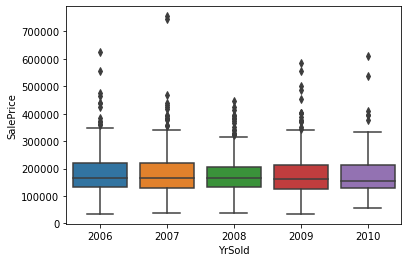

In [14]:
#Un boxplot des 5 dernières années afin de voir la quantité d'outliers.
sns.boxplot(x= df_clean["YrSold"], y=df_clean["SalePrice"])

In [15]:
# Je supprime les données manquantes de mon dataframe d'origine.
df.dropna(axis=1)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


<AxesSubplot:>

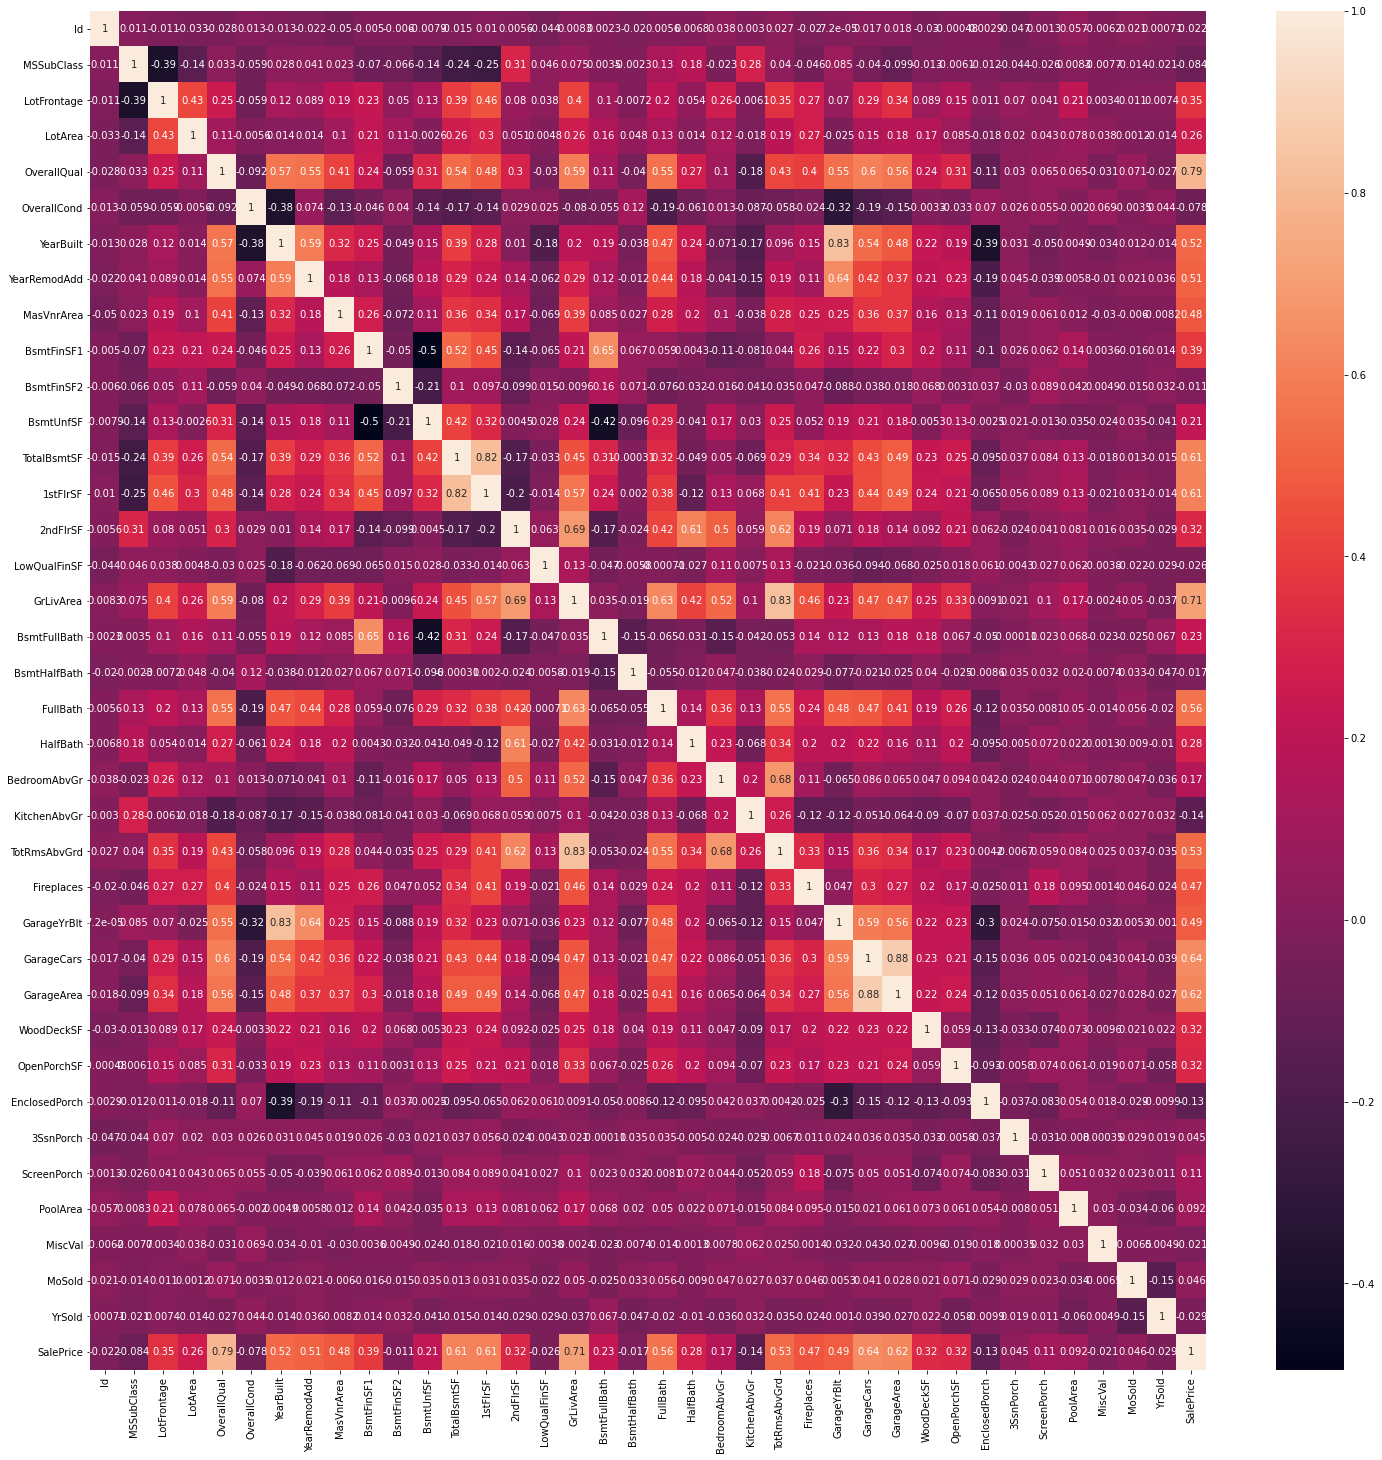

In [16]:
#Je vérifie tout de même les correlations avec le dataframe d'origine sans les données manquantes.

fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(df.corr(), annot=True)

In [17]:
#Je crée un nouveau dataframe avec les données ayant la meilleure correlation avec SalePrice.
df_clean_two = df[["OverallQual", "YearBuilt", "YearRemodAdd", "TotalBsmtSF", "1stFlrSF", "GrLivArea", "FullBath", "TotRmsAbvGrd", "GarageCars", "GarageArea", "SalePrice"]]

<AxesSubplot:>

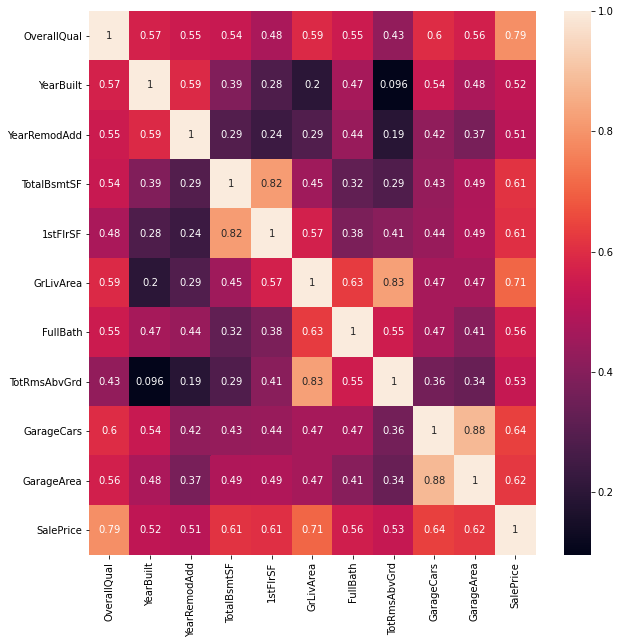

In [18]:
#Je revérifie ces correlations.
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_clean_two.corr(), annot=True)

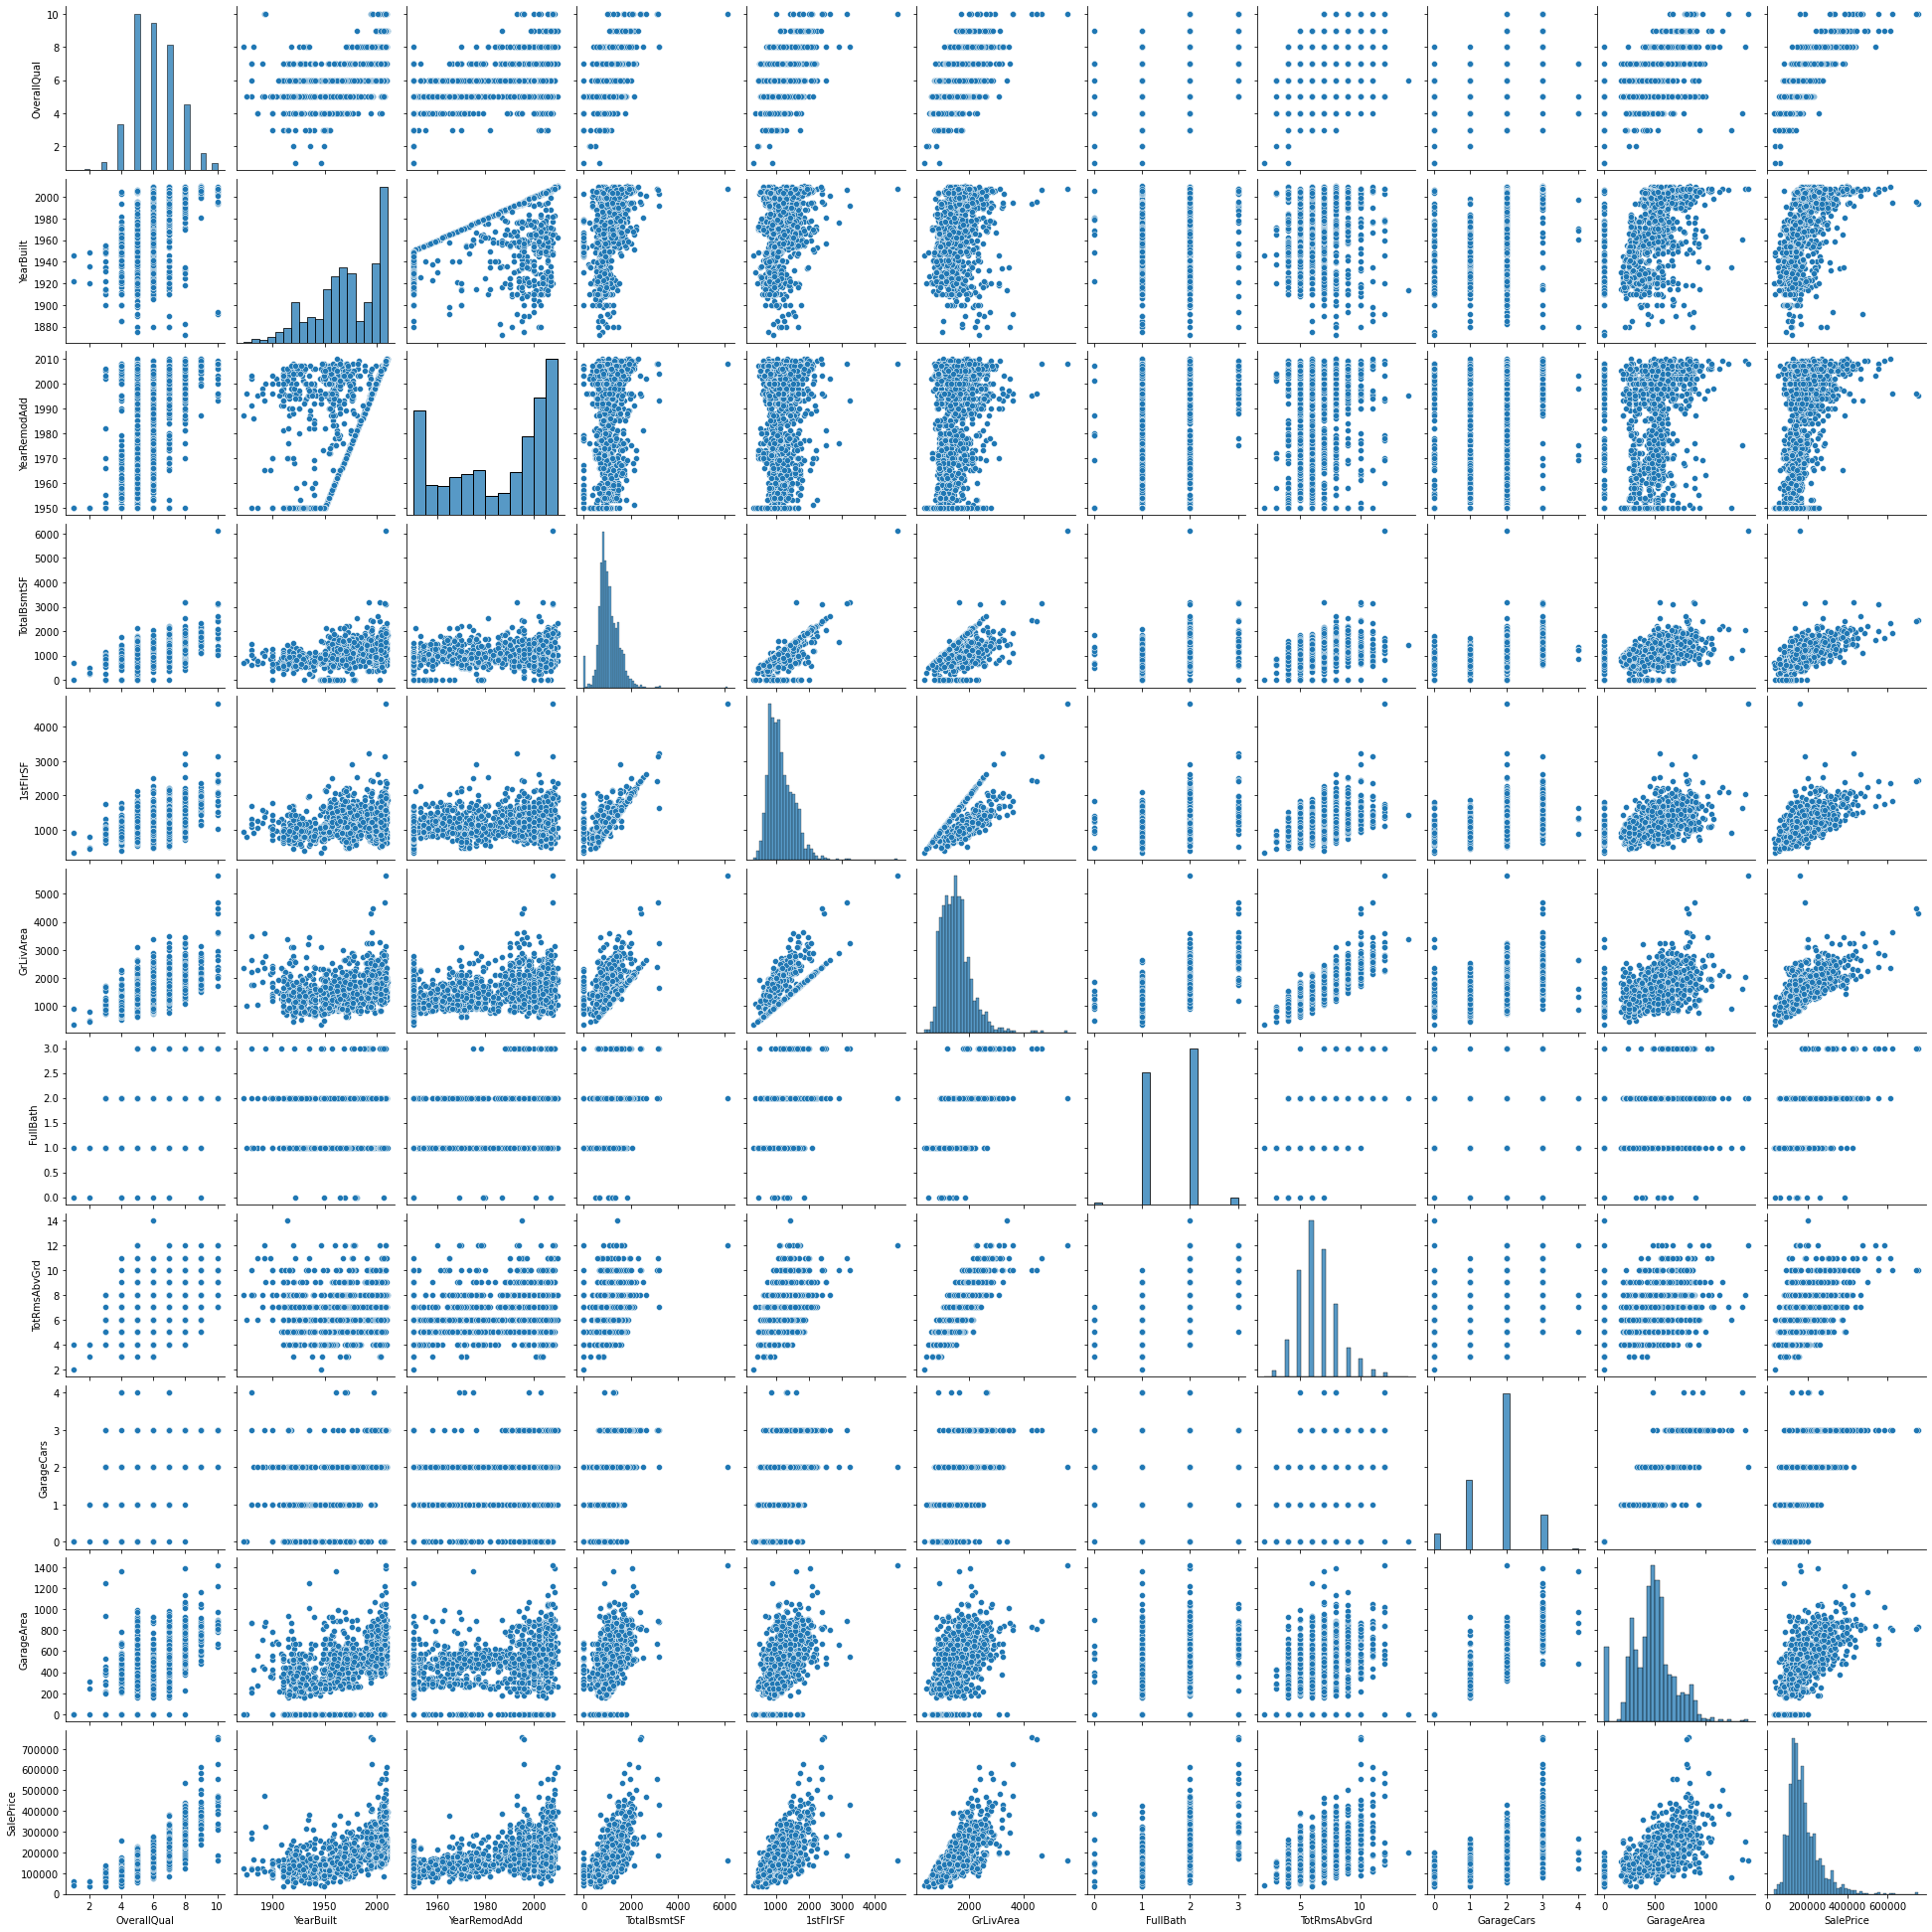

In [19]:
#J'affiche une vue d'ensemble des corrélations entre les différentes valeurs du dataframe. 
sns.pairplot(df_clean_two)

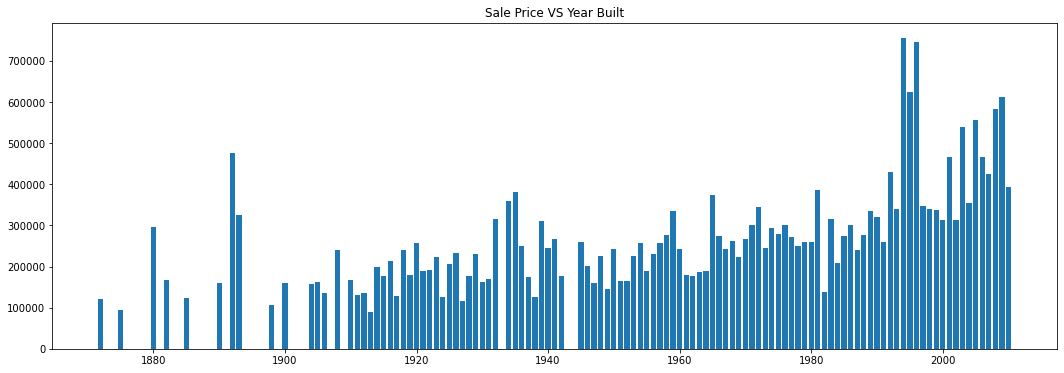

In [20]:
"""Sur cette visualisation on peut voir qu'il y a peur de corrélation 
entre l'année de construction et le prix de vente du bien immobilier. Cependant une hausse est a notée depuis le milieu
des années 90."""
plt.figure(figsize=(18, 6))
plt.bar( df_clean_two['YearBuilt'], df_clean['SalePrice'])
plt.title('Sale Price VS Year Built')
plt.show()

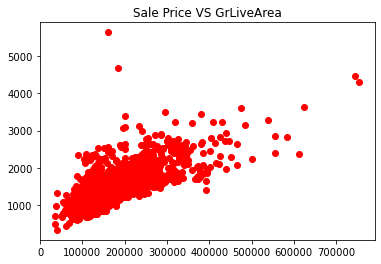

In [21]:
# Contrairement a ce que l'on peut croire, le lieu d'ou se trouve le bien immobilier n'influe pas sur le prix de vente.
plt.plot(df_clean_two["SalePrice"], df_clean_two["GrLivArea"], 'ro')
plt.title('Sale Price VS GrLiveArea')
plt.show()

Text(0.5, 1.0, 'Sale Price VS OverallQual')

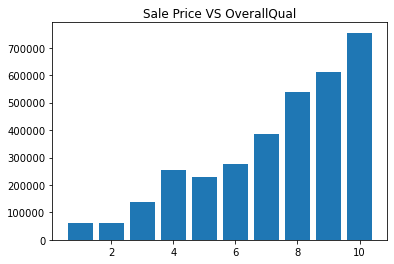

In [22]:
# La qualité du bien est cependant corrélée au prix de vente.

plt.bar(df_clean_two["OverallQual"], df_clean_two["SalePrice"])
plt.title('Sale Price VS OverallQual')

In [24]:
""" Nous avons un R² de 50% sur notre regression linéaire SalePrice VS GrLivArea. Ce qui soutient la vision de notre visualisation ci dessus."""
results = smf.ols('SalePrice ~ GrLivArea', data=df_clean_two).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Thu, 20 May 2021   Prob (F-statistic):          4.52e-223
Time:                        16:34:07   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.857e+04   4480.755      4.144      0.0

In [25]:
#Je transforme les pieds carrés en metre carré pour avoir une préduction juste.
df_clean_two[["TotalBsmtSF", "1stFlrSF", "GrLivArea","GarageArea"]] = df_clean_two[["TotalBsmtSF", "1stFlrSF", "GrLivArea","GarageArea"]].apply(lambda x: x / 10.7639).round(2)

C:\Users\lotar\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [26]:
X = df_clean_two[["GrLivArea"]]
y = df_clean_two["SalePrice"]

In [29]:
# A l'image de StatsModel, notre regression est également de l'ordre de 50% de fiabilité.

model = LinearRegression()
model.fit(X, y)
model.score(X, y)


0.5021491861311453

In [28]:
#Voici notre prédiction pour un bien de 58m².
model.predict([[58]])

array([85451.00828979])